In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,plot_precision_recall_curve,precision_recall_curve
from lightgbm import LGBMClassifier
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance.csv to predictive_maintenance.csv


In [ ]:
df=pd.read_csv('predictive_maintenance.csv')

In [ ]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["Failure Type"])

In [ ]:
encoded_results_1

array([[0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)

In [ ]:
encoded_results_2 = labelbinarizer.fit_transform(df["Type"])

In [ ]:
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

In [ ]:
df1 = pd.concat([df,df_encoded_1, df_encoded_2], axis=1)

In [ ]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,M,298.1,308.6,1551,42.8,0,0,No Failure,0,1,0,0,0,0,0,0,1
1,L,298.2,308.7,1408,46.3,3,0,No Failure,0,1,0,0,0,0,0,1,0
2,L,298.1,308.5,1498,49.4,5,0,No Failure,0,1,0,0,0,0,0,1,0
3,L,298.2,308.6,1433,39.5,7,0,No Failure,0,1,0,0,0,0,0,1,0
4,L,298.2,308.7,1408,40.0,9,0,No Failure,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure,0,1,0,0,0,0,0,0,1
9996,H,298.9,308.4,1632,31.8,17,0,No Failure,0,1,0,0,0,0,1,0,0
9997,M,299.0,308.6,1645,33.4,22,0,No Failure,0,1,0,0,0,0,0,0,1
9998,H,299.0,308.7,1408,48.5,25,0,No Failure,0,1,0,0,0,0,1,0,0


In [ ]:
df1.drop(['Product ID',"UDI","Type","Failure Type"], axis=1, inplace=True)

In [ ]:
df1.drop(["Type","Failure Type"], axis=1, inplace=True)

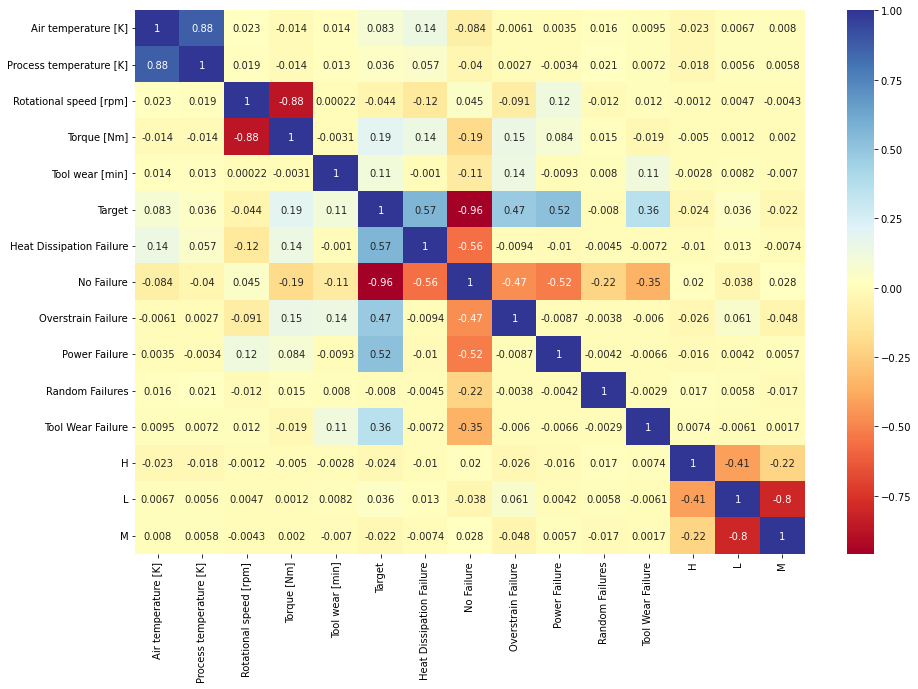

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

In [ ]:
df1.isnull().values.any()

False

In [ ]:
df1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,0,0,0,1,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,0,0,0,1,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,0,0,0,1,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,0,0,0,0,0,1
9996,298.9,308.4,1632,31.8,17,0,0,1,0,0,0,0,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,0,0,0,0,0,1
9998,299.0,308.7,1408,48.5,25,0,0,1,0,0,0,0,1,0,0


In [ ]:
DF = df1[['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','H','L','M','Target','No Failure','Heat Dissipation Failure','Overstrain Failure','Power Failure','Tool Wear Failure',
 'Random Failures']]

In [ ]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
DF.columns=DF.columns.astype("str")

In [ ]:
col_name=DF.columns.to_list()

In [ ]:
col_name

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'H',
 'L',
 'M',
 'Target',
 'No Failure',
 'Heat Dissipation Failure',
 'Overstrain Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Random Failures']

In [ ]:
DF = DF.reset_index(drop=True)

In [ ]:
DF

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],H,L,M,Target,No Failure,Heat Dissipation Failure,Overstrain Failure,Power Failure,Tool Wear Failure,Random Failures
0,298.1,308.6,1551,42.8,0,0,0,1,0,1,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,1,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,1,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,1,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1,0,1,0,0,0,0,0
9996,298.9,308.4,1632,31.8,17,1,0,0,0,1,0,0,0,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1,0,1,0,0,0,0,0
9998,299.0,308.7,1408,48.5,25,1,0,0,0,1,0,0,0,0,0


In [ ]:
X = DF.values[:, 0:8].astype("float")
y = DF.values[:,8:].astype("uint8")
print(X.shape)
print(y.shape)

(10000, 8)
(10000, 7)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [ ]:
y_train.shape

(6700, 7)

In [ ]:
y_test.shape

(3300, 7)

In [ ]:
scaler = StandardScaler().fit(X_test)

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
from sklearn.multioutput import ClassifierChain

In [ ]:
model_lgb = MultiOutputClassifier(estimator=lgbm,n_jobs=None)

In [ ]:
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

In [ ]:
model_lgb_pred = chain_lgbm.fit(X_train, y_train)

In [ ]:
print(model_lgb_pred.score(X_test,y_test))

0.983030303030303


In [ ]:
yhat_lgb = model_lgb_pred.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_lgb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_lgb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_lgb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_lgb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_lgb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_lgb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_lgb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_lgb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_lgb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_lgb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_lgb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_lgb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_lgb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_lgb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_lgb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_lgb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_lgb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_lgb[:,5])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,6],yhat_lgb[:,6])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,6],yhat_lgb[:,6])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,6],yhat_lgb[:,6])))

Accuracy Score: 0.9864
Average Precision Score: 0.6157
Matthews correlation coefficient: 0.7713
Accuracy Score: 0.9861
Average Precision Score: 0.9884
Matthews correlation coefficient: 0.7688
Accuracy Score: 0.9988
Average Precision Score: 0.8795
Matthews correlation coefficient: 0.9369
Accuracy Score: 0.9961
Average Precision Score: 0.6119
Matthews correlation coefficient: 0.7787
Accuracy Score: 0.9945
Average Precision Score: 0.4536
Matthews correlation coefficient: 0.6682
Accuracy Score: 0.9955
Average Precision Score: 0.0042
Matthews correlation coefficient: -0.0011
Accuracy Score: 0.9982
Average Precision Score: 0.0018
Matthews correlation coefficient: 0.0000


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3189
           1       0.88      0.68      0.77       111

    accuracy                           0.99      3300
   macro avg       0.94      0.84      0.88      3300
weighted avg       0.99      0.99      0.99      3300



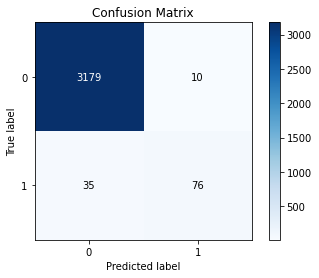

              precision    recall  f1-score   support

           0       0.89      0.67      0.77       113
           1       0.99      1.00      0.99      3187

    accuracy                           0.99      3300
   macro avg       0.94      0.83      0.88      3300
weighted avg       0.99      0.99      0.99      3300



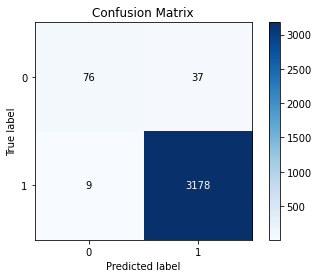

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       0.94      0.94      0.94        32

    accuracy                           1.00      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       1.00      1.00      1.00      3300



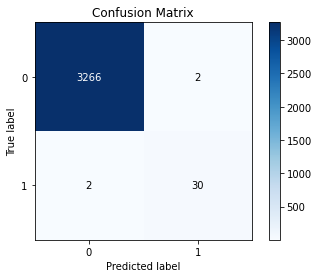

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3269
           1       0.82      0.74      0.78        31

    accuracy                           1.00      3300
   macro avg       0.91      0.87      0.89      3300
weighted avg       1.00      1.00      1.00      3300



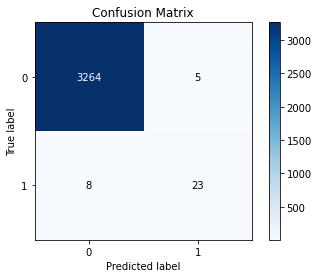

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3270
           1       0.75      0.60      0.67        30

    accuracy                           0.99      3300
   macro avg       0.87      0.80      0.83      3300
weighted avg       0.99      0.99      0.99      3300



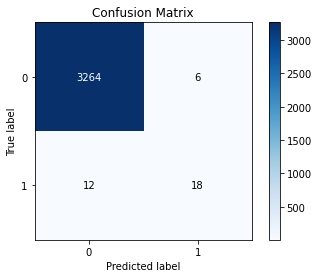

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3286
           1       0.00      0.00      0.00        14

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



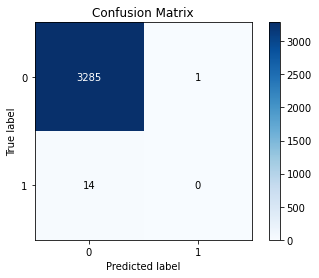

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3294
           1       0.00      0.00      0.00         6

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       1.00      1.00      1.00      3300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


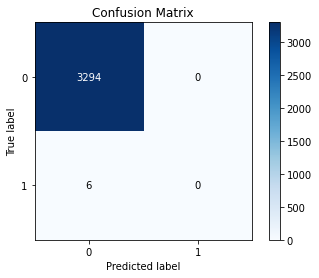

In [ ]:
print(classification_report(y_test[:,0],yhat_lgb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_lgb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_lgb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_lgb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_lgb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_lgb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_lgb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_lgb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_lgb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_lgb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_lgb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_lgb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_lgb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_lgb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_lgb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_lgb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_lgb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_lgb[:,5], normalize=False)
plt.show()
print(classification_report(y_test[:,6],yhat_lgb[:,6]))
tn, fp, fn, tp = confusion_matrix(y_test[:,6],yhat_lgb[:,6]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,6],yhat_lgb[:,6], normalize=False)
plt.show()

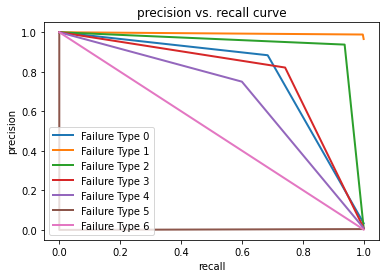

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 7
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_lgb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
rand = RandomForestClassifier()
rf = MultiOutputClassifier(estimator=rand)

In [ ]:
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))

0.9727272727272728


In [ ]:
yhat_rand = rf.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_rand[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_rand[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_rand[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_rand[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_rand[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_rand[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_rand[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_rand[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_rand[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_rand[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_rand[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_rand[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_rand[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_rand[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_rand[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_rand[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_rand[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_rand[:,5])))

Accuracy Score: 0.9809
Average Precision Score: 0.4599
Matthews correlation coefficient: 0.6577
Accuracy Score: 0.9803
Average Precision Score: 0.9823
Matthews correlation coefficient: 0.6502
Accuracy Score: 0.9939
Average Precision Score: 0.3830
Matthews correlation coefficient: 0.6120
Accuracy Score: 0.9930
Average Precision Score: 0.2849
Matthews correlation coefficient: 0.5253
Accuracy Score: 0.9952
Average Precision Score: 0.5047
Matthews correlation coefficient: 0.7057
Accuracy Score: 0.9958
Average Precision Score: 0.0042
Matthews correlation coefficient: 0.0000


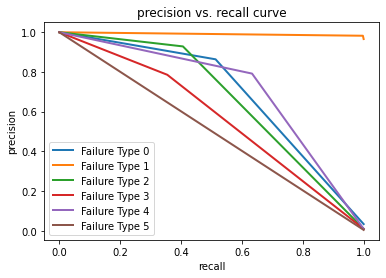

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_rand[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3189
           1       0.86      0.51      0.64       111

    accuracy                           0.98      3300
   macro avg       0.92      0.76      0.82      3300
weighted avg       0.98      0.98      0.98      3300



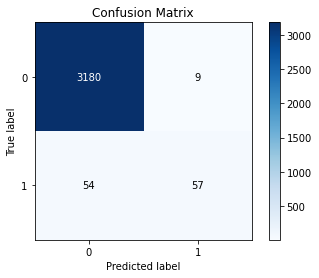

              precision    recall  f1-score   support

           0       0.88      0.50      0.63       113
           1       0.98      1.00      0.99      3187

    accuracy                           0.98      3300
   macro avg       0.93      0.75      0.81      3300
weighted avg       0.98      0.98      0.98      3300



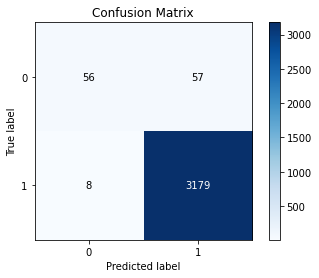

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3268
           1       0.93      0.41      0.57        32

    accuracy                           0.99      3300
   macro avg       0.96      0.70      0.78      3300
weighted avg       0.99      0.99      0.99      3300



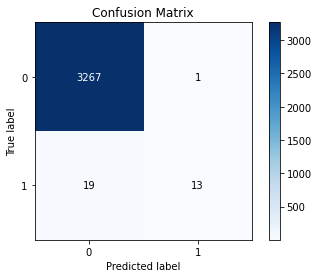

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3269
           1       0.79      0.35      0.49        31

    accuracy                           0.99      3300
   macro avg       0.89      0.68      0.74      3300
weighted avg       0.99      0.99      0.99      3300



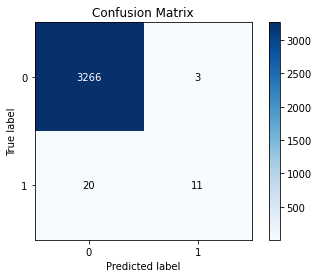

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3270
           1       0.79      0.63      0.70        30

    accuracy                           1.00      3300
   macro avg       0.89      0.82      0.85      3300
weighted avg       0.99      1.00      0.99      3300



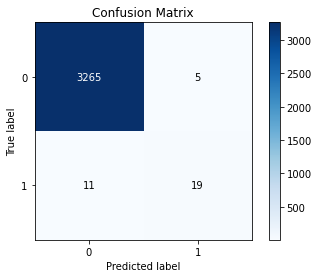

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3286
           1       0.00      0.00      0.00        14

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



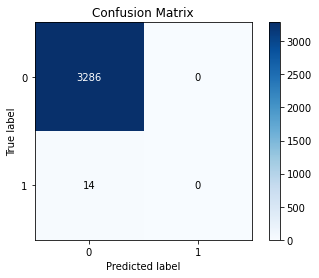

In [ ]:
print(classification_report(y_test[:,0],yhat_rand[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_rand[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_rand[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_rand[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_rand[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_rand[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_rand[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_rand[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_rand[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_rand[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_rand[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_rand[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_rand[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_rand[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_rand[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_rand[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_rand[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_rand[:,5], normalize=False)
plt.show()

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
catb = CatBoostClassifier()
model_catb = MultiOutputClassifier(estimator=catb)

In [ ]:
model_catb.fit(X_train, y_train)
print(model_catb.score(X_test, y_test))

In [ ]:
yhat_catb = model_catb.predict(X_test)

In [ ]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_catb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_catb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_catb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_catb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_catb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_catb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_catb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_catb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_catb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_catb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_catb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_catb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_catb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_catb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_catb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_catb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_catb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_catb[:,5])))

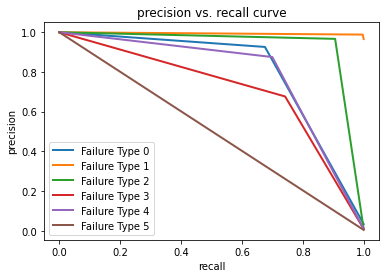

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 6
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_catb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3189
           1       0.93      0.68      0.78       111

    accuracy                           0.99      3300
   macro avg       0.96      0.84      0.89      3300
weighted avg       0.99      0.99      0.99      3300



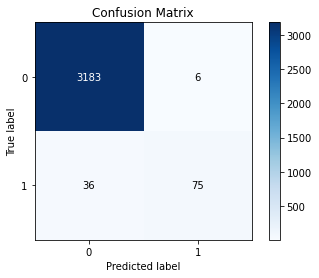

              precision    recall  f1-score   support

           0       0.88      0.66      0.76       113
           1       0.99      1.00      0.99      3187

    accuracy                           0.99      3300
   macro avg       0.94      0.83      0.88      3300
weighted avg       0.98      0.99      0.98      3300



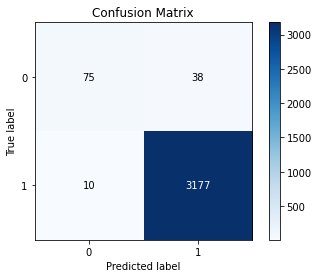

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3268
           1       0.97      0.91      0.94        32

    accuracy                           1.00      3300
   macro avg       0.98      0.95      0.97      3300
weighted avg       1.00      1.00      1.00      3300



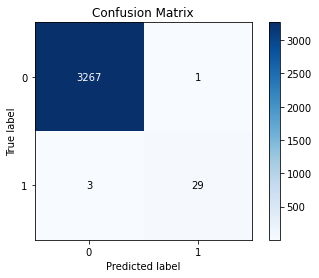

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3269
           1       0.68      0.74      0.71        31

    accuracy                           0.99      3300
   macro avg       0.84      0.87      0.85      3300
weighted avg       0.99      0.99      0.99      3300



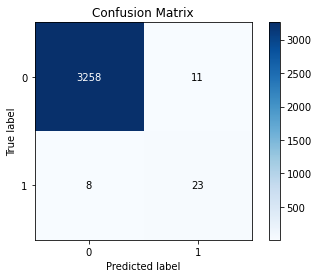

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3270
           1       0.88      0.70      0.78        30

    accuracy                           1.00      3300
   macro avg       0.94      0.85      0.89      3300
weighted avg       1.00      1.00      1.00      3300



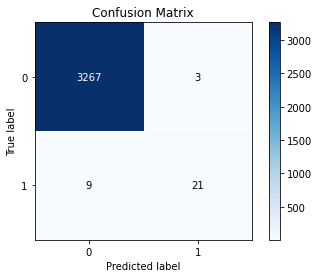

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3286
           1       0.00      0.00      0.00        14

    accuracy                           1.00      3300
   macro avg       0.50      0.50      0.50      3300
weighted avg       0.99      1.00      0.99      3300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


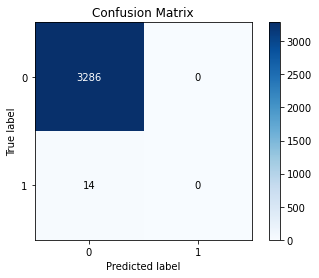

In [ ]:
print(classification_report(y_test[:,0],yhat_catb[:,0]))
tn, fp, fn, tp = confusion_matrix(y_test[:,0],yhat_catb[:,0]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,0],yhat_catb[:,0], normalize=False)
plt.show()
print(classification_report(y_test[:,1],yhat_catb[:,1]))
tn, fp, fn, tp = confusion_matrix(y_test[:,1],yhat_catb[:,1]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,1],yhat_catb[:,1], normalize=False)
plt.show()
print(classification_report(y_test[:,2],yhat_catb[:,2]))
tn, fp, fn, tp = confusion_matrix(y_test[:,2],yhat_catb[:,2]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,2],yhat_catb[:,2], normalize=False)
plt.show()
print(classification_report(y_test[:,3],yhat_catb[:,3]))
tn, fp, fn, tp = confusion_matrix(y_test[:,3],yhat_catb[:,3]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,3],yhat_catb[:,3], normalize=False)
plt.show()
print(classification_report(y_test[:,4],yhat_catb[:,4]))
tn, fp, fn, tp = confusion_matrix(y_test[:,4],yhat_catb[:,4]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,4],yhat_catb[:,4], normalize=False)
plt.show()
print(classification_report(y_test[:,5],yhat_catb[:,5]))
tn, fp, fn, tp = confusion_matrix(y_test[:,5],yhat_catb[:,5]).ravel()
skplt.metrics.plot_confusion_matrix(y_test[:,5],yhat_catb[:,5], normalize=False)
plt.show()